In [27]:
setwd("~/Documents/DE/2019/Shed/")
require(ggplot2)
require(nlme)
require(tidyr)
require(MASS)
require(glmm)
require(dplyr)

In [28]:
cells=read.csv("Cells_found.csv")
oysters=read.csv("Oyster_data.csv")

In [29]:
head(oysters)

ID,Salinity,TISSUE,MORTALITY.DATE
1Y,HIGH,NA,24-Oct
26Y,HIGH,4,
27Y,HIGH,NA,20-Oct
28Y,HIGH,2,
29Y,HIGH,NA,11-Nov
30Y,HIGH,3,


In [30]:
cells=gather(cells, date, number, X10.15.AMBIENT:X11.11.HEAT)
cells=na.omit(cells)

In [31]:
cells=separate(cells, date, c("month","day", "Treatment" ))

In [32]:
head(cells)

,ID,month,day,Treatment,number
18,43Y,X10,15,AMBIENT,2
19,45Y,X10,15,AMBIENT,0
20,46Y,X10,15,AMBIENT,1
22,48Y,X10,15,AMBIENT,40
23,49Y,X10,15,AMBIENT,0
24,50Y,X10,15,AMBIENT,4


In [120]:
all=merge(cells,oysters, by="ID")

In [121]:
all$Trial=ifelse(all$day=="15"|all$day=="20"|all$day== "31"| all$day=="7", "one", "two")

## Influence of salinity on mackin score of tissue (for oysters that survived) 

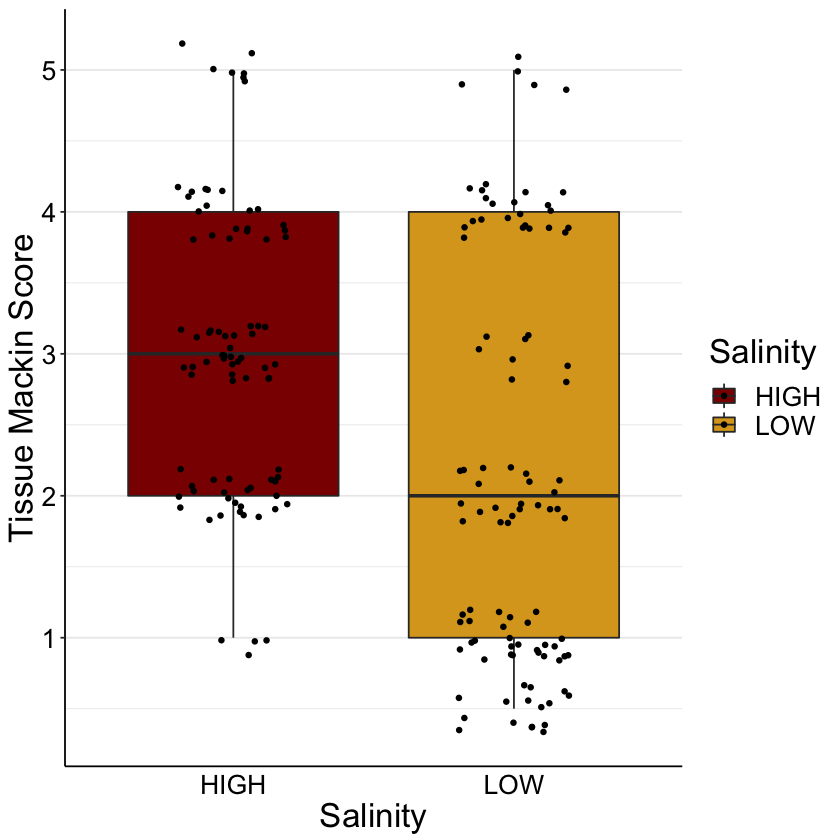

In [122]:
ggplot(na.omit(all), aes(x = Salinity, y = TISSUE, fill=Salinity)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
        geom_boxplot()+
geom_jitter(shape=16, position=position_jitter(0.2))+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Tissue Mackin Score")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


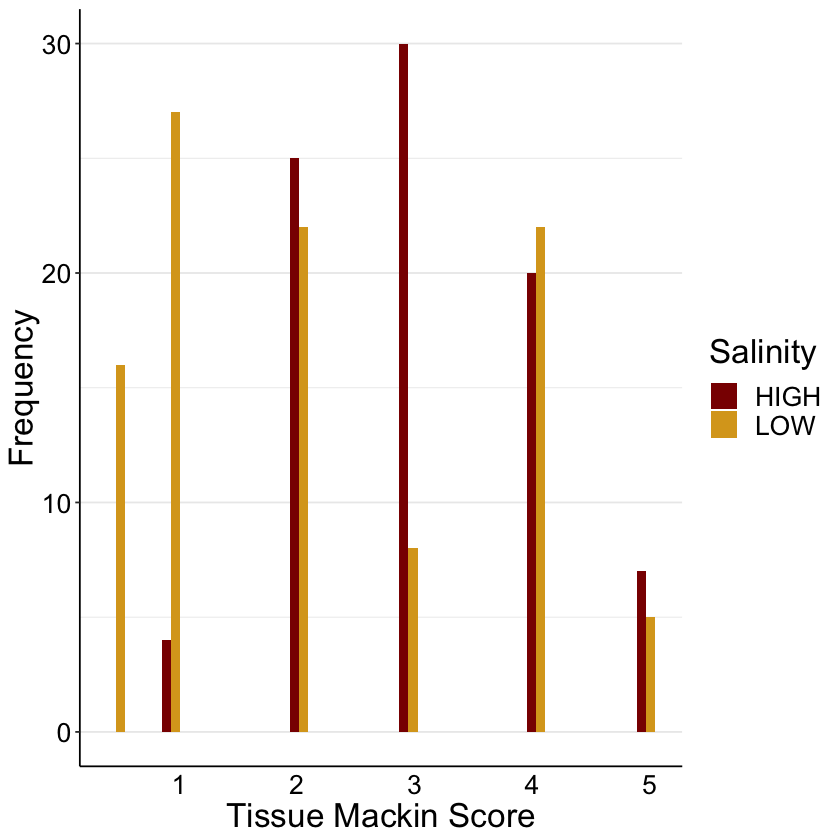

In [127]:
ggplot(na.omit(all), aes(x=TISSUE, fill=Salinity)) +
  geom_histogram(position="dodge")+
scale_fill_manual(values=c("darkred", "goldenrod"))+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Frequency")+xlab("Tissue Mackin Score")

two anovas within high and low look at sorry effect of mackin score on and see if the slopes are different 

In [11]:
head(all)

ID,month,day,Treatment,number,Salinity,TISSUE,MORTALITY.DATE,Trial
10W,X10,31,HEAT,27,LOW,0.5,,one
10W,X11,2,HEAT,0,LOW,0.5,,two
11W,X11,7,HEAT,13,LOW,1.0,7-Nov,one
11W,X10,24,AMBIENT,1,LOW,1.0,7-Nov,two
11W,X10,20,AMBIENT,0,LOW,1.0,7-Nov,one
12W,X10,31,HEAT,302,LOW,1.0,,one


In [158]:
all$TISSUE=as.factor(as.character(all$TISSUE))

logistic regression with mackin score as ordinal response. 

In [38]:
m = polr(TISSUE ~ Salinity, data = na.omit(all), Hess=TRUE)

## view a summary of the model
summary(m)
(ctable <- coef(summary(m)))

p <- pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2
(ctable <- cbind(ctable, "p value" = p))

Call:
polr(formula = TISSUE ~ Salinity, data = na.omit(all), Hess = TRUE)

Coefficients:
             Value Std. Error t value
SalinityLOW -1.236     0.2759   -4.48

Intercepts:
      Value   Std. Error t value
0.5|1 -3.1545  0.3246    -9.7187
1|2   -1.7681  0.2365    -7.4765
2|3   -0.5220  0.1929    -2.7067
3|4    0.3938  0.1958     2.0107
4|5    2.1842  0.3155     6.9231

Residual Deviance: 609.4176 
AIC: 621.4176 

,Value,Std. Error,t value
SalinityLOW,-1.2358760,0.2758753,-4.479835
0.5|1,-3.1545380,0.3245857,-9.718661
1|2,-1.7681425,0.2364918,-7.476547
2|3,-0.5219875,0.1928509,-2.706689
3|4,0.3937792,0.1958372,2.010748
4|5,2.1842295,0.3154993,6.923088


,Value,Std. Error,t value,p value
SalinityLOW,-1.2358760,0.2758753,-4.479835,7.470061e-06
0.5|1,-3.1545380,0.3245857,-9.718661,2.510617e-22
1|2,-1.7681425,0.2364918,-7.476547,7.630075e-14
2|3,-0.5219875,0.1928509,-2.706689,6.795795e-03
3|4,0.3937792,0.1958372,2.010748,4.435209e-02
4|5,2.1842295,0.3154993,6.923088,4.419017e-12


## Influence of heat on number of cells released. broken up by mackin score of tissue. colors are replicates (2 times per temp) only displayed oysters that survived to get rftm of tissue

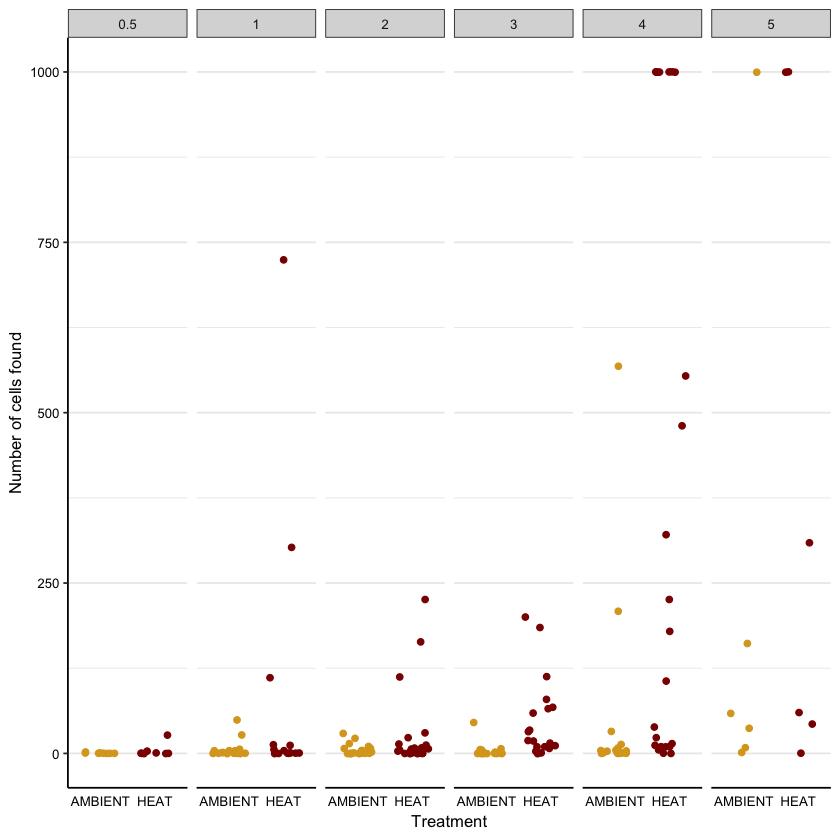

In [14]:
ggplot(na.omit(all), aes(x = Treatment, y = number, col=Treatment, group=ID)) +
scale_color_manual(values=c("goldenrod", "darkred"))+
       geom_jitter(position=position_jitter(0.3))+
#geom_line()+
 facet_grid(. ~ TISSUE)+
theme_bw()+
 
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=10))+
ylab("Number of cells found")

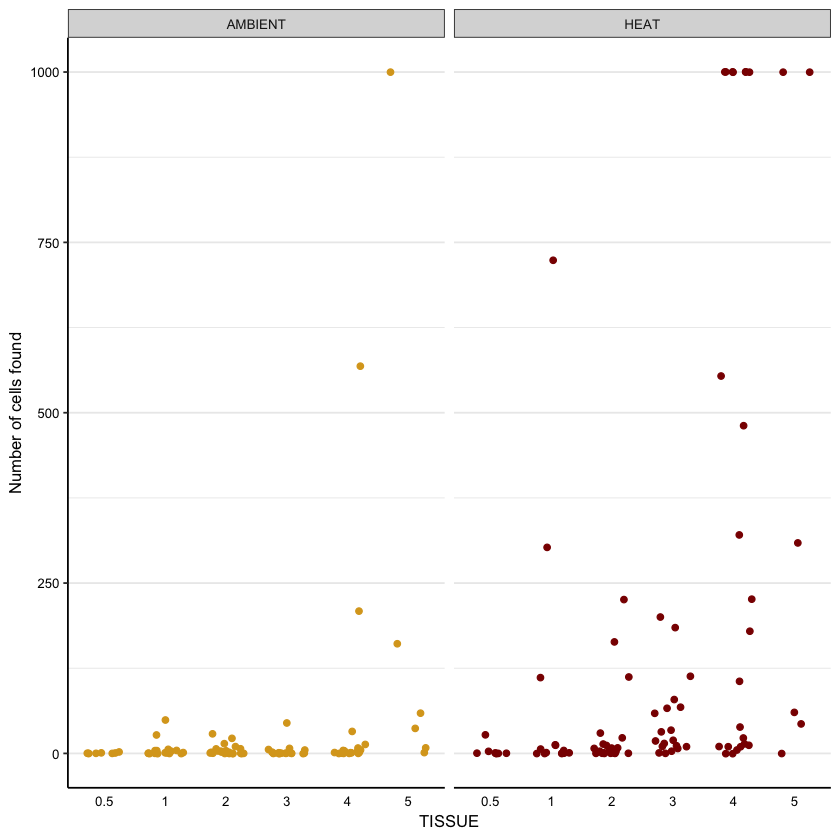

In [15]:
ggplot(na.omit(all), aes(x = TISSUE, y = number, col=Treatment, group=ID)) +
scale_color_manual(values=c("goldenrod", "darkred"))+
       geom_jitter(position=position_jitter(0.3))+
#geom_line()+
 facet_grid(. ~ Treatment)+
theme_bw()+
 
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=10))+
ylab("Number of cells found")

In [20]:
mackin=glmm(number~TISSUE, data=na.omit(all), random=~0+ID, varcomps.names="ID", poisson.glmm, m=100)

In [21]:
summary(mackin)
cor(na.omit(all)$number, na.omit(all)$TISSUE)


Call:
glmm(fixed = number ~ TISSUE, random = ~0 + ID, varcomps.names = "ID", 
    data = na.omit(all), family.glmm = poisson.glmm, m = 100)


Link is: "log"

Fixed Effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.1327     0.1691   0.785    0.433    
TISSUE1       2.0773     0.1714  12.122   <2e-16 ***
TISSUE2       1.8791     0.1730  10.860   <2e-16 ***
TISSUE3       2.6935     0.1720  15.661   <2e-16 ***
TISSUE4       4.5307     0.1693  26.754   <2e-16 ***
TISSUE5       4.8832     0.1699  28.748   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
   Estimate Std. Error z value Pr(>|z|)/2    
ID   1.8858     0.3663   5.148   1.32e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


ERROR: Error in cor(na.omit(all)$number, na.omit(all)$TISSUE): 'y' must be numeric


In [39]:
infected=na.omit(all)
head(infected)
length(unique(infected$ID))

ID,month,day,Treatment,number,Salinity,TISSUE,MORTALITY.DATE,Trial
10W,X10,31,HEAT,27,LOW,0.5,,one
10W,X11,2,HEAT,0,LOW,0.5,,two
11W,X11,7,HEAT,13,LOW,1,7-Nov,one
11W,X10,24,AMBIENT,1,LOW,1,7-Nov,two
11W,X10,20,AMBIENT,0,LOW,1,7-Nov,one
12W,X10,31,HEAT,302,LOW,1,,one


[1] 53

In [40]:
multi = function(x) {
      c(avg = mean(x, na.rm=TRUE), se = sd(x, na.rm=TRUE)/sqrt(length(x)) )
}

In [41]:
means=as.data.frame(aggregate(number~ID+Treatment, data=infected, FUN=multi))
means$avg=means$number[,1]
means$se=means$number[,2]
means=means[-3]

In [42]:
diffs=as.data.frame(aggregate(avg~ID, data=means, FUN=diff))

In [43]:
diffs$Salinity=ifelse(substr(diffs$ID,3,3)=="W", "Low", "High")
diffs$avg=as.numeric(as.character(diffs$avg))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [44]:
diffsm=merge(diffs, oysters, by="ID")

In [45]:
head(diffsm)

ID,avg,Salinity.x,Salinity.y,TISSUE,MORTALITY.DATE
10W,NA,Low,LOW,0.5,
11W,12.5,Low,LOW,1.0,7-Nov
12W,151.0,Low,LOW,1.0,
13W,2.5,Low,LOW,0.5,
14W,NA,Low,LOW,2.0,
15W,NA,Low,LOW,4.0,


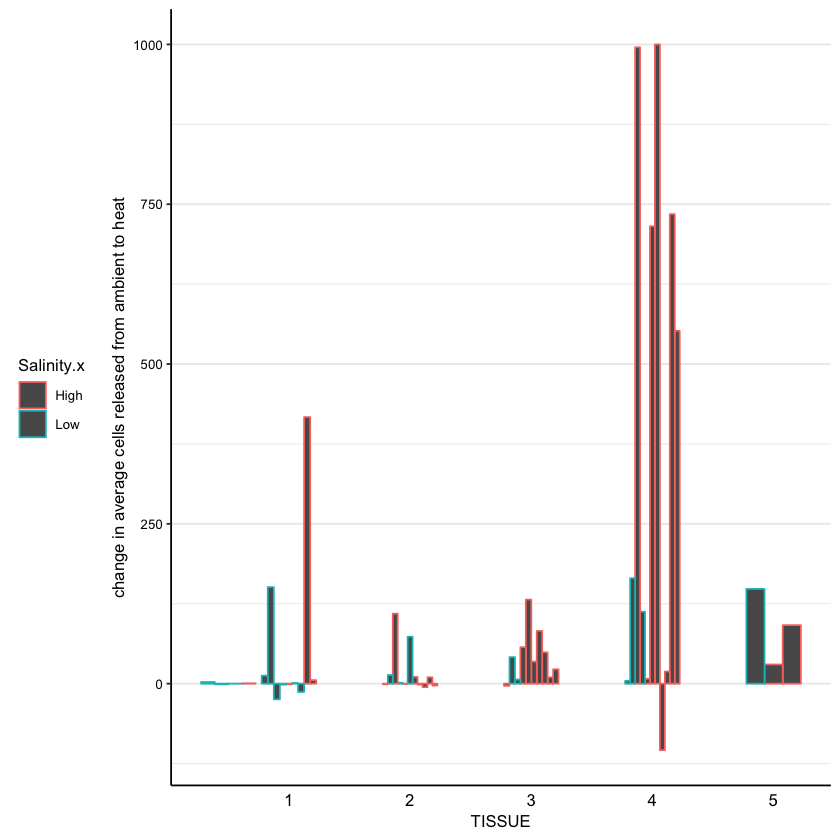

In [115]:
ggplot(na.omit(diffsm), aes(x = TISSUE, y = avg, group=ID, color=Salinity.x)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
geom_bar(stat="identity", position="dodge")+
theme_bw()+
 theme(legend.position="left", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
       axis.text.x=element_text(size=10), 
          text = element_text(size=10))+
ylab("change in average cells released from ambient to heat")

one sample t test with null as 0. 
run a separate t test, alternatively do a 95% ci and see if they overlap 
plot difference value as function of score. 

Look at relationship between intensity and shedding. if there is a relationship then need to deal with it. maybe an ancova? have to do it separately for each one unless its the same relationship. 

difference value is your dependent variable. Can you build a model that is looking at salinity by intensity? 
y axis is difference between temps. x axis is intensity, graph the two salinity

also could just look at differeence for high and low salniigy
if theres no relationship with intensity, fine to just compare high and low salinity. 

In [30]:
t.test(na.omit(diffsm$avg), mu=0)


	One Sample t-test

data:  na.omit(diffsm$avg)
t = 3.2271, df = 47, p-value = 0.00228
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  44.40293 191.39568
sample estimates:
mean of x 
 117.8993 


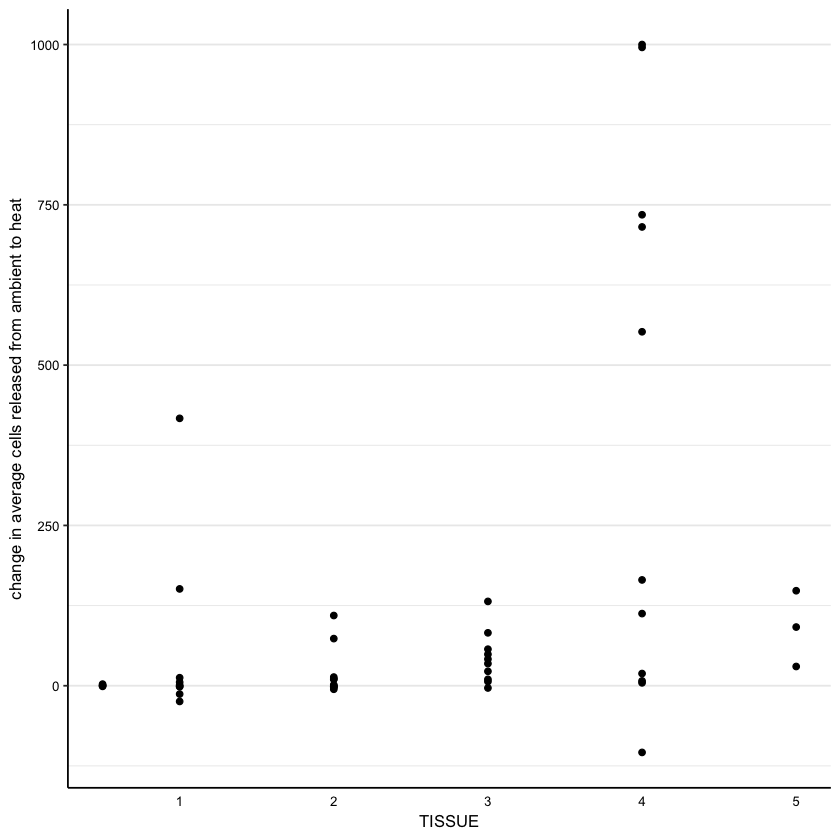

In [31]:
ggplot(na.omit(diffsm), aes(x = TISSUE, y = avg)) +
geom_point()+
theme_bw()+
 theme(legend.position="left", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=10))+
ylab("change in average cells released from ambient to heat")

In [32]:
cor(na.omit(diffsm)$TISSUE, na.omit(diffsm)$avg)
linearMod <- lm(avg~TISSUE, data=na.omit(diffsm))
summary(linearMod)

[1] 0.3770456


Call:
lm(formula = avg ~ TISSUE, data = na.omit(diffsm))

Residuals:
    Min      1Q  Median      3Q     Max 
-325.44 -110.69  -68.44    9.56  778.56 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -62.56      73.77  -0.848  0.40079   
TISSUE         71.00      25.72   2.761  0.00825 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 237 on 46 degrees of freedom
Multiple R-squared:  0.1422,	Adjusted R-squared:  0.1235 
F-statistic: 7.623 on 1 and 46 DF,  p-value: 0.00825


In [35]:
ancovasal=lm(data=na.omit(diffsm), avg~Salinity.x+TISSUE)
summary(ancovasal)


Call:
lm(formula = avg ~ Salinity.x + TISSUE, data = na.omit(diffsm))

Residuals:
    Min      1Q  Median      3Q     Max 
-341.73 -117.72  -50.11   29.43  762.27 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -13.44      88.12  -0.153   0.8794  
Salinity.xLow   -75.35      74.01  -1.018   0.3141  
TISSUE           62.79      26.94   2.331   0.0243 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 236.9 on 45 degrees of freedom
Multiple R-squared:  0.1615,	Adjusted R-squared:  0.1242 
F-statistic: 4.333 on 2 and 45 DF,  p-value: 0.01902


In [36]:
head(all)

ID,month,day,Treatment,number,Salinity,TISSUE,MORTALITY.DATE,Trial
10W,X10,31,HEAT,27,LOW,0.5,,one
10W,X11,2,HEAT,0,LOW,0.5,,two
11W,X11,7,HEAT,13,LOW,1,7-Nov,one
11W,X10,24,AMBIENT,1,LOW,1,7-Nov,two
11W,X10,20,AMBIENT,0,LOW,1,7-Nov,one
12W,X10,31,HEAT,302,LOW,1,,one


In [37]:
ancovasal2=lm(data=na.omit(all), number~Salinity+TISSUE)
summary(ancovasal)


Call:
lm(formula = avg ~ Salinity.x + TISSUE, data = na.omit(diffsm))

Residuals:
    Min      1Q  Median      3Q     Max 
-341.73 -117.72  -50.11   29.43  762.27 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -13.44      88.12  -0.153   0.8794  
Salinity.xLow   -75.35      74.01  -1.018   0.3141  
TISSUE           62.79      26.94   2.331   0.0243 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 236.9 on 45 degrees of freedom
Multiple R-squared:  0.1615,	Adjusted R-squared:  0.1242 
F-statistic: 4.333 on 2 and 45 DF,  p-value: 0.01902


following schwartz do a repeated measures. Four diffferent response variables (four time points)?? . within subjects factor is temp and between is salinity. Construct it as multiple anova but manova. Repeated measures manova. Sequential temperature. 


In [38]:
unique()

ERROR: Error in is.factor(x): argument "x" is missing, with no default


difference value between ambient and heat, expect to be zero if theres no effect. need to account for oyster ID. 

Notes from talking to Lisa:
Is there info on metabolic rate of ectotherm/oysters and temperature Growth rate or filtration rate? 
Filtration and release rates as a function of temperature, plus pathogen infection probability. 
ARe pathogens growing faster, or are they infecting more efficiently, or are they 
Also focusing more on the host makes it easier to translate to alternate hosts
Encorporate salinity just into the pathogen dynamics? 
Can't just be like temperature only affects oysters and salinity only affects the pathogen. 
Look at temperature effects on perkinsus marinus. 

See if there's a metabolic response to salinity on the oyster... Need to 

Are there papers about Perkinsus and temperature? 

I decide if there are more experiments to tease apart hypotheses. 

What is the tempareture range 


## Tillie's time data

In [130]:
time=read.csv("MN_Cellsfound.csv")
oystertime=read.csv("MN_Oysters.csv")

In [131]:
oystertime_s=oystertime[c(2,7)]

In [132]:
time_oyster_1=merge(time, oystertime_s, by="Replicate")

In [133]:
head(time_oyster_1)

Replicate,Time,Salinity,number,Temp,RFTM.Score
1,6,Low,0,68.35599,0
1,24,Low,0,81.18714,0
1,18,Low,0,87.06976,0
1,12,Low,0,79.85940,0
2,6,Low,0,68.35599,0
2,24,Low,0,81.18714,0


In [134]:
light= data.frame("Time"=c("6", "12", "18", "24"), "Watts" = c(0,217265/60, 300291/60, 42664/60))

In [135]:
time_oyster=merge(time_oyster_1, light, by="Time")

In [144]:
list_mean=aggregate(time_oyster$number, by=list(time_oyster$Replicate),
  FUN=sum, na.rm=TRUE)
keep=list_mean[!list_mean$x==0,]
colnames(keep)=c("Replicate","total")

In [154]:
list_mean

Group.1,x
1,0
10,0
11,0
12,0
13,0
14,2
15,0
16,0
17,0
18,3


In [149]:
time_oyster$number=as.numeric(as.character(time_oyster$number))
time_oyster$Replicate=as.factor(as.character(time_oyster$Replicate))
time_oyster$Time=factor(as.character(time_oyster$Time), levels=c(6, 12, 18, 24), order=FALSE)

infected_time=merge(time_oyster, keep, by="Replicate")
infected_time$percent=infected_time$number/infected_time$total*100

In [153]:
(infected_time)

Replicate,Time,Salinity,number,Temp,RFTM.Score,Watts,total,percent,lognum
14,18,Intermediate,1,87.06976,5.0,5004.8500,2,50.0000000,0.3010300
14,12,Intermediate,1,79.85940,5.0,3621.0833,2,50.0000000,0.3010300
14,6,Intermediate,0,68.35599,5.0,0.0000,2,0.0000000,0.0000000
14,24,Intermediate,0,81.18714,5.0,711.0667,2,0.0000000,0.0000000
18,12,Intermediate,0,79.85940,3.0,3621.0833,3,0.0000000,0.0000000
18,6,Intermediate,3,68.35599,3.0,0.0000,3,100.0000000,0.6020600
18,18,Intermediate,0,87.06976,3.0,5004.8500,3,0.0000000,0.0000000
18,24,Intermediate,0,81.18714,3.0,711.0667,3,0.0000000,0.0000000
19,12,Intermediate,0,79.85940,0.5,3621.0833,1,0.0000000,0.0000000
19,24,Intermediate,0,81.18714,0.5,711.0667,1,0.0000000,0.0000000


In [151]:
infected_time$lognum=log10(infected_time$number+1)

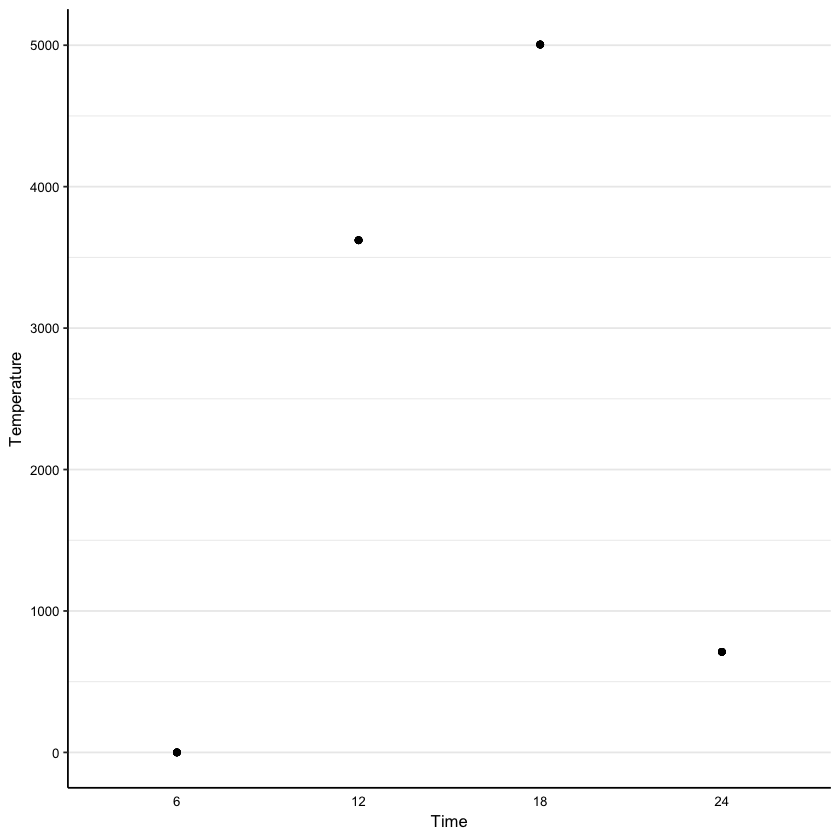

In [48]:
ggplot(na.omit(infected_time), aes(x = Time, y = Watts)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point()+
geom_line()+
#facet_grid(. ~ Salinity)+
theme_bw()+
 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=10))+
ylab("Temperature")

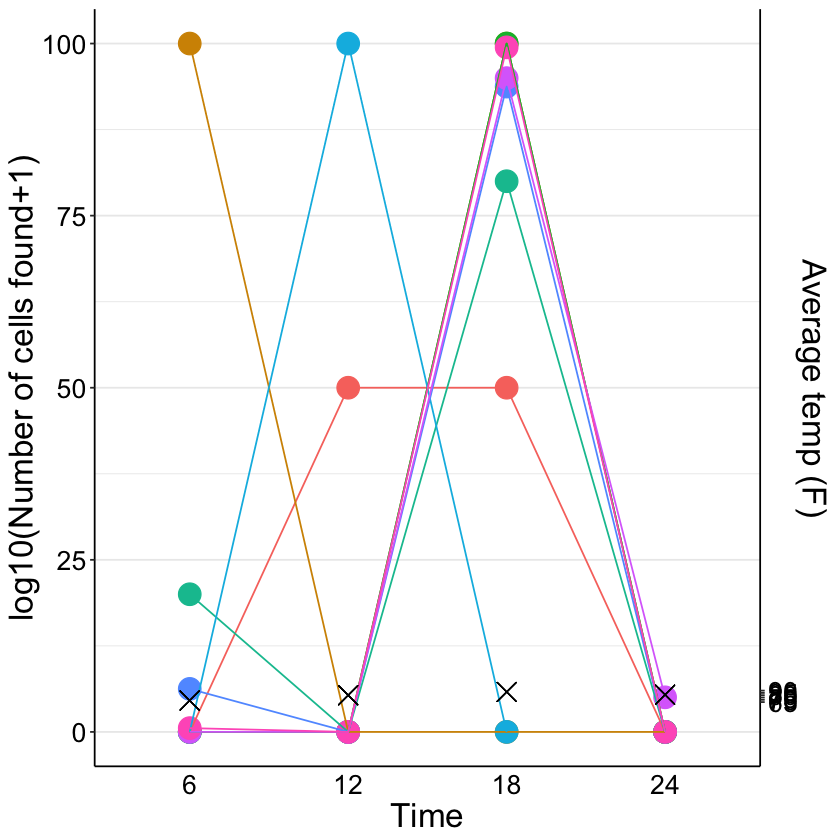

In [152]:
ggplot(na.omit(infected_time), aes(x = Time, y = percent, col=Replicate, group=Replicate)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
geom_line()+
#facet_grid(. ~ Salinity)+
geom_point(aes(x = Time, y = Temp/15), col="black", pch=4, size=5)+
   scale_y_continuous(sec.axis = sec_axis(~.*15, name = "Average temp (F)", breaks=c(65, 70, 75, 80, 85, 90)))+
theme_bw()+
 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("log10(Number of cells found+1)")

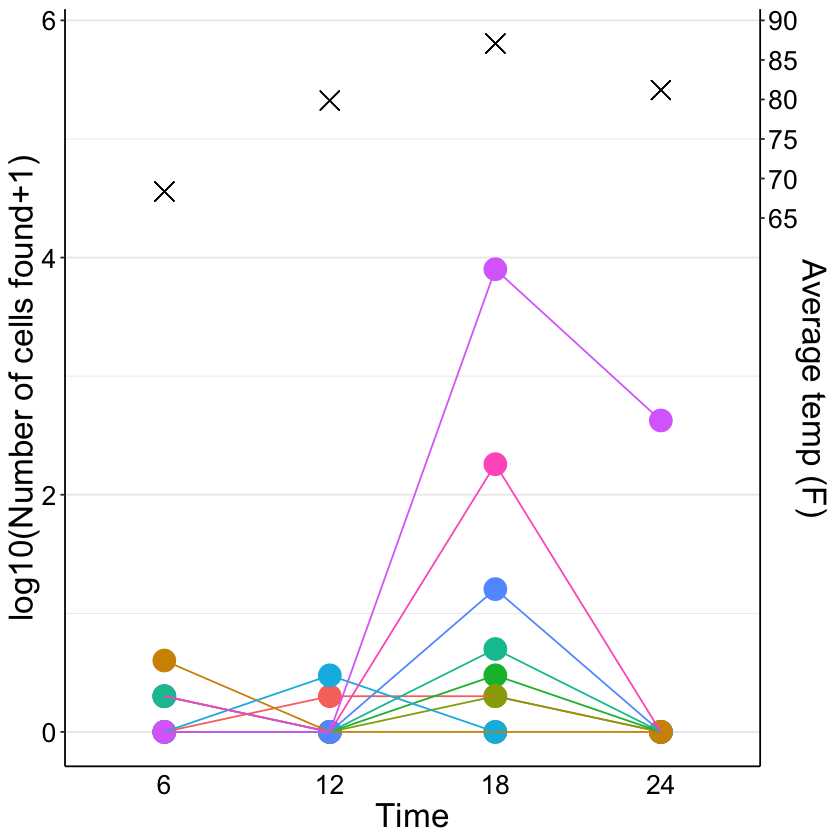

In [49]:
ggplot(na.omit(infected_time), aes(x = Time, y = lognum, col=Replicate, group=Replicate)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
geom_line()+
#facet_grid(. ~ Salinity)+
geom_point(aes(x = Time, y = Temp/15), col="black", pch=4, size=5)+
   scale_y_continuous(sec.axis = sec_axis(~.*15, name = "Average temp (F)", breaks=c(65, 70, 75, 80, 85, 90)))+
theme_bw()+
 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("log10(Number of cells found+1)")

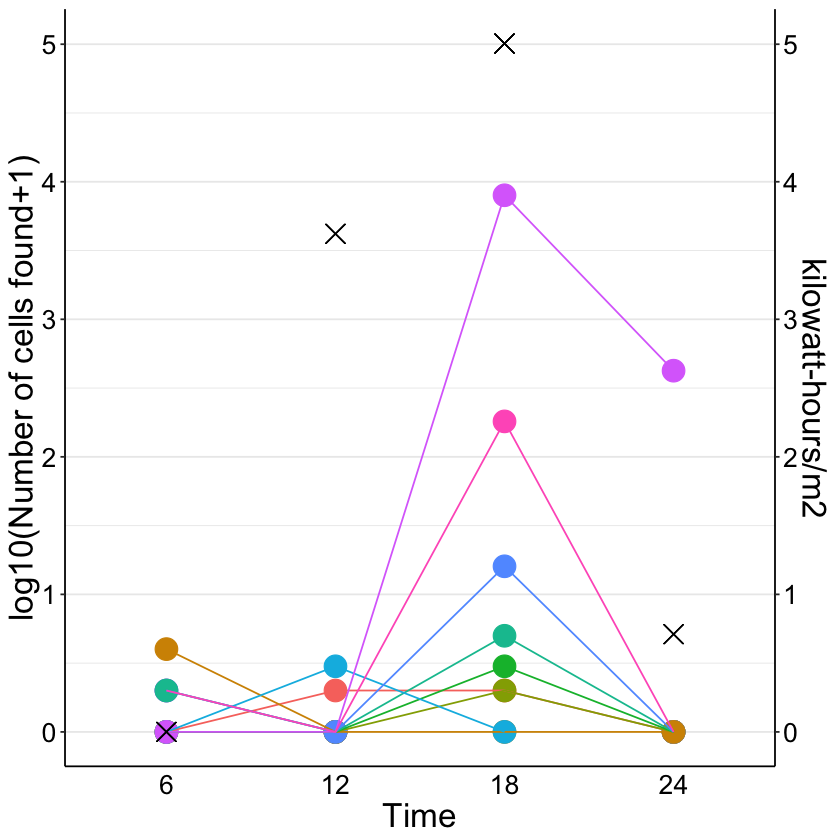

In [50]:
ggplot(na.omit(infected_time), aes(x = Time, y = lognum, col=Replicate, group=Replicate)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
geom_line()+
#facet_grid(. ~ Salinity)+
geom_point(aes(x = Time, y = Watts/1000), col="black", pch=4, size=5)+
   scale_y_continuous(sec.axis = sec_axis(~., name = "kilowatt-hours/m2", breaks=c(0, 1, 2, 3, 4, 5)))+
theme_bw()+
 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("log10(Number of cells found+1)")

In [51]:
time_oyster$number=as.integer(time_oyster$number)

In [52]:
temp=glmm(number~Temp, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
time=glmm(number~Time, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
light=glmm(number~Watts, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)


In [53]:
summary(time)


Call:
glmm(fixed = number ~ Time, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -6.9380     0.4083  -16.99   <2e-16 ***
Time12       -0.6931     0.7071   -0.98    0.327    
Time18        7.2177     0.4084   17.67   <2e-16 ***
Time24        4.2539     0.4111   10.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.055      0.960   4.224    1.2e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [54]:
summary(temp)


Call:
glmm(fixed = number ~ Temp, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -49.588551   0.688100  -72.07   <2e-16 ***
Temp          0.572518   0.007929   72.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.060      0.958   4.238   1.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [55]:
summary(light)


Call:
glmm(fixed = number ~ Watts, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.382e+00  9.295e-02  -68.66   <2e-16 ***
Watts        1.305e-03  1.927e-05   67.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.514      1.065   4.239   1.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [56]:
time_oyster$Time=relevel(time_oyster$Time, ref = "12")
time2=glmm(number~Time, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
summary(time2)


Call:
glmm(fixed = number ~ Time, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -7.6327     0.5774 -13.220   <2e-16 ***
Time6         0.6931     0.7071   0.980    0.327    
Time18        7.9109     0.5775  13.699   <2e-16 ***
Time24        4.9474     0.5794   8.539   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.292      1.019   4.213   1.26e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [57]:
time_oyster$Time=relevel(time_oyster$Time, ref = "18")
time3=glmm(number~Time, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
summary(time3)


Call:
glmm(fixed = number ~ Time, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.26561    0.01117   23.79   <2e-16 ***
Time12      -7.91105    0.57746  -13.70   <2e-16 ***
Time6       -7.21790    0.40840  -17.67   <2e-16 ***
Time24      -2.96406    0.04992  -59.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.510      1.064   4.239   1.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [58]:
time_oyster$Time=relevel(time_oyster$Time, ref = "24")
time4=glmm(number~Time, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
summary(time4)


Call:
glmm(fixed = number ~ Time, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.70295    0.04889 -55.286   <2e-16 ***
Time18       2.96376    0.04992  59.371   <2e-16 ***
Time12      -4.94720    0.57940  -8.539   <2e-16 ***
Time6       -4.25406    0.41114 -10.347   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate   4.0583     0.9576   4.238   1.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [59]:
summary(temp)


Call:
glmm(fixed = number ~ Temp, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -49.588551   0.688100  -72.07   <2e-16 ***
Temp          0.572518   0.007929   72.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.060      0.958   4.238   1.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Filtration

In [68]:
filtration=read.csv("Filtration.csv")

In [90]:
filtration$change=filtration$Time0-filtration$Time6

In [ ]:
#low1=filtration[filtration$Date=="10/16/19" & filtration$Salinity=="low",]
#c=low1[low1$Oyster=="control",]
#apply(low1[,6:12], 1, function(x) x-c)



In [91]:
paste0(filtration$Oyster[1])

[1] "W4"

In [92]:
infected_filt=filtration[filtration$ID %in% infected$ID,]

In [76]:
head(infected_filt)

,Date,Jar,Salinity,Temp,Oyster,ID,Time0,Time1,Time2,Time3,Time4,Time5,Time6
1,10/16/19,1,low,ambient,W4,4W,1.34,0.58,0.48,0.40,0.34,0.30,0.24
2,10/16/19,2,low,ambient,W29,29W,1.45,0.88,0.64,0.53,0.52,0.43,0.37
3,10/16/19,3,low,ambient,W28,28W,1.26,0.61,0.48,0.42,0.37,0.35,0.32
5,10/16/19,5,low,ambient,W42,42W,1.27,0.78,0.62,0.54,0.46,0.42,0.37
6,10/16/19,6,low,ambient,W26,26W,1.26,0.76,0.65,0.52,0.47,0.43,0.38
7,10/16/19,7,low,ambient,W45,45W,1.31,0.65,0.48,0.34,0.28,0.24,0.21


In [77]:
infected_filt$change=infected_filt$Time0-infected_filt$Time6

In [93]:
head(infected_filt)

,Date,Jar,Salinity,Temp,Oyster,ID,Time0,Time1,Time2,Time3,Time4,Time5,Time6,change
1,10/16/19,1,low,ambient,W4,4W,1.34,0.58,0.48,0.40,0.34,0.30,0.24,1.10
2,10/16/19,2,low,ambient,W29,29W,1.45,0.88,0.64,0.53,0.52,0.43,0.37,1.08
3,10/16/19,3,low,ambient,W28,28W,1.26,0.61,0.48,0.42,0.37,0.35,0.32,0.94
5,10/16/19,5,low,ambient,W42,42W,1.27,0.78,0.62,0.54,0.46,0.42,0.37,0.90
6,10/16/19,6,low,ambient,W26,26W,1.26,0.76,0.65,0.52,0.47,0.43,0.38,0.88
7,10/16/19,7,low,ambient,W45,45W,1.31,0.65,0.48,0.34,0.28,0.24,0.21,1.10


In [162]:
infected_filt=pivot_longer(infected_filt,  cols = starts_with("Time"), names_to = "Time")

In [163]:
infected_filt_all=merge(infected_filt, all, by="ID")
head(infected_filt_all)

ID,Date,Jar,Salinity.x,Temp,Oyster,change,Time,value,month,day,Treatment,number,Salinity.y,TISSUE,MORTALITY.DATE,Trial
10W,11/11/19,9,low,heated,W10,1.97,Time6,0.20,X10,31,HEAT,27,LOW,0.5,,one
10W,11/11/19,9,low,heated,W10,1.97,Time6,0.20,X11,2,HEAT,0,LOW,0.5,,two
10W,11/11/19,9,low,heated,W10,1.97,Time3,0.49,X10,31,HEAT,27,LOW,0.5,,one
10W,11/11/19,9,low,heated,W10,1.97,Time3,0.49,X11,2,HEAT,0,LOW,0.5,,two
10W,11/11/19,9,low,heated,W10,1.97,Time1,1.10,X10,31,HEAT,27,LOW,0.5,,one
10W,11/11/19,9,low,heated,W10,1.97,Time1,1.10,X11,2,HEAT,0,LOW,0.5,,two


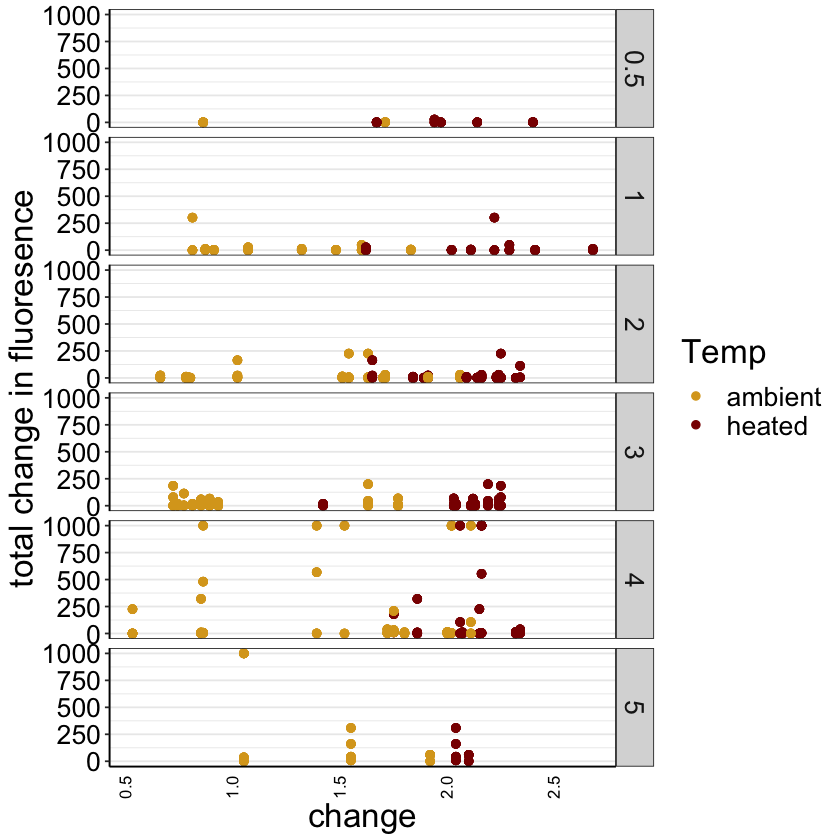

In [170]:
ggplot(na.omit(infected_filt_all), aes(x = change, y = number, col=Temp)) +
scale_color_manual(values=c( "goldenrod", "darkred"))+
        geom_point(size=2)+
#geom_line()+
facet_grid( TISSUE~.)+

theme_bw()+
 theme(legend.position="right", 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text=element_text(size=20),
       axis.text.x = element_text(size=10, angle=90))+
ylab("total change in fluoresence")

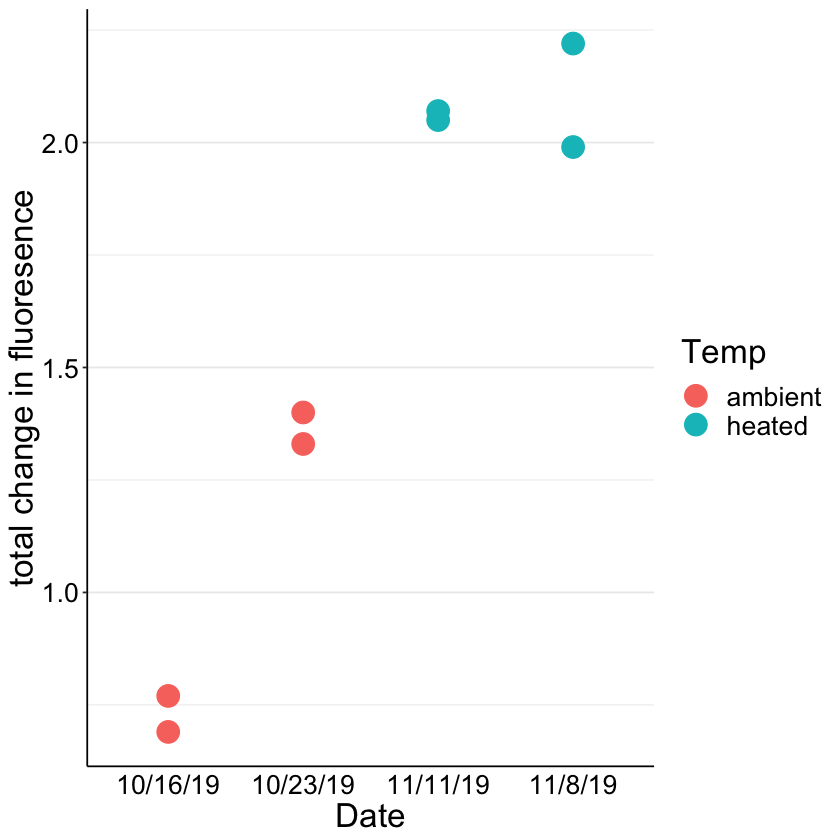

In [100]:
ggplot(na.omit(filtration[filtration$ID=="CONTROL",]), aes(x = Date, y = change, col=Temp, group=ID)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
#geom_line()+
#facet_grid(. ~ Salinity)+

theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("total change in fluoresence")

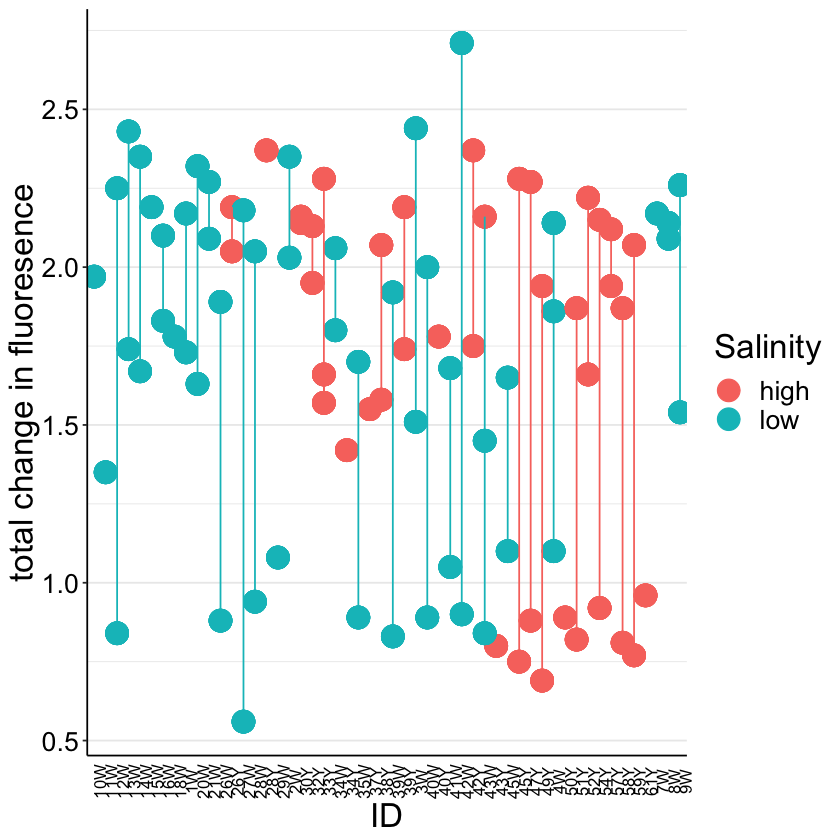

In [171]:
ggplot(na.omit(infected_filt), aes(x = ID, y = change, col=Salinity, group=ID)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
geom_line()+
#facet_grid(. ~ Salinity)+

theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text=element_text(size=20),
       axis.text.x = element_text(size=10, angle=90))+
ylab("total change in fluoresence")